In [24]:
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time

# helpers, nothing interesting inside
from cs231nlib.utils import load_CIFAR10;
from cs231nlib.utils import visualize_CIFAR;

print("Hellow world")

Hellow world


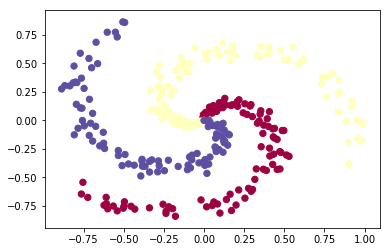

In [25]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [32]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(1):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  print(db)
  print(X.T)
  print(dscores)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097294
[[ -4.01504095e-05  -1.10317623e-04   1.50468032e-04]]
[[  0.00000000e+00   1.51514802e-03  -9.87008412e-03   6.83146596e-04
    1.58934112e-03  -4.07669377e-03   1.55263575e-02   9.84880635e-03
    4.99877200e-02   4.78374477e-02   4.54035642e-02   7.85035838e-02
    3.41601850e-02   8.29928758e-02   5.73502799e-02   1.02828216e-01
    1.17014570e-01   9.85056453e-02   9.50730290e-02   1.35725383e-01
    1.20548460e-01   1.67905407e-01   1.75295097e-01   1.29671883e-01
    2.08800192e-01   2.43753175e-01   2.06270192e-01   2.67687657e-01
    2.17743378e-01   2.54525845e-01   3.01238294e-01   2.86966972e-01
    2.92402881e-01   3.32429816e-01   3.43396560e-01   3.49306190e-01
    3.53783196e-01   3.71438140e-01   3.66505154e-01   3.93689095e-01
    4.00643120e-01   4.07038977e-01   3.55920143e-01   4.27895729e-01
    4.38883697e-01   4.31043382e-01   4.38210272e-01   4.07765116e-01
    4.55308851e-01   4.86927118e-01   4.97167210e-01   4.09745231e-01
    4.33

In [27]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.51


(-1.8463097979447065, 1.8336902020552968)

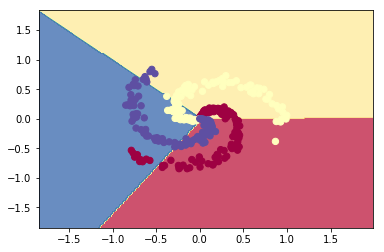

In [22]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')